# Your task this week is to create a few simple image processing functions, which might help with data augmentation. Such functions are already available in multiple libraries like opencv and etc, but getting a bit of practice is still useful. 
## Hence, you are only allowed to use the libraries imported below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import math
from random import random, randint

#5%, fill this in:
my_name_is = "Rustem Sankubayev"
my_name_is

'Rustem Sankubayev'

In [2]:
def show_result(image):
    print(image.shape)
    plt.imshow(image)
    plt.show()

def set_up(file_name):
    image = img.imread(file_name)
    return image

## Task 1. Complete standard image augmentation functions, such as rotation, random cropping, flipping and shifting

In [3]:
def rotate_clockwise(v_image, angle):
    new_image = v_image.copy()
    while angle >= 90:
        angle -= 90
        new_image = np.rot90(new_image, k=-1, axes=(0, 1))
    return new_image


In [4]:
def random_crop(v_image, cut_percent=10, v_color=(0, 0, 0)):
    """
    fills a rectangle at random position with specified color, and the fill is actually a cut percentage
    (ex 50% means a random rectangle of size 50% of the image in both dimensions is created at the random position.)
    If the rectangle crop is going over the image boundary, no need to extend the image - fill only the existing space
    """
    if cut_percent >= 95 or cut_percent <= 5:
        print("No changes were done, please change the cut percentage")
        return v_image

    new_image = v_image.copy()
    h = v_image.shape[0]
    w = v_image.shape[1]
    cut_h = int(h*cut_percent/100)
    cut_w = int(w*cut_percent/100)

    stat_h = randint(0, h-cut_h)
    stat_w = randint(0, w-cut_w)

    new_image[stat_h:stat_h+cut_h, stat_w:stat_w+cut_w] = v_color
    return new_image


In [5]:
def shift_right(v_image, pixels=100, color=(0, 0, 0)):
    """shift image right by n pixels"""
    new_image = v_image.copy()
    new_image = np.roll(new_image, pixels, axis=1)
    new_image[:, :pixels] = color
    return new_image


In [6]:
def random_shift_right(v_image, v_color=(0, 0, 0)):
    """shift the image right by a random number of pixels (in range of image sizes)"""
    w = v_image.shape[1]
    shift_pixel = randint(0, w)
    v_image = shift_right(v_image, shift_pixel, v_color)
    return v_image


In [7]:
def shift_down(v_image, pixels, v_color=(0, 0, 0)):
    """shift image down by n pixels"""
    new_image = v_image.copy()
    new_image = np.roll(new_image, pixels, axis=0)
    new_image[:pixels, :] = v_color
    return new_image


In [8]:
def random_shift_down(v_image, v_color=(0, 0, 0)):
    """shift the image down by a random number of pixels (in range of image sizes)"""
    h = v_image.shape[0]
    shift_pixel = randint(0, h)
    v_image = shift_down(v_image, shift_pixel, v_color)
    return v_image


In [9]:
def flip_vertical(v_image):
    new_image = v_image.copy()
    new_image = np.flipud(new_image)
    return new_image


In [10]:
def flip_horizontal(v_image):
    new_image = v_image.copy()
    new_image = np.fliplr(new_image)
    return new_image


(394, 700, 3)


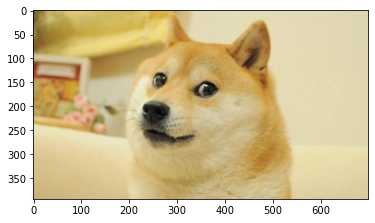

[94 93 49] [255.   0.   0.] 3


In [11]:
image = set_up("dog.jpg") #load Original image

show_result(image)
#Just colors you're going to use for the image augmentation. Dont forget, image is in a RGB format.
red = np.array((255, 0, 0), dtype=np.float32)
green=np.array((0, 255, 0), dtype=np.float32)
blue=np.array((0, 0, 255), dtype=np.float32)
white=np.array((255, 255, 255),dtype=np.float32)
grey=np.array((128, 128, 128),dtype=np.float32)
black=np.array((0, 0, 0),dtype=np.float32)

print(image[1][2],red,red.shape[0])

(394, 700, 3)


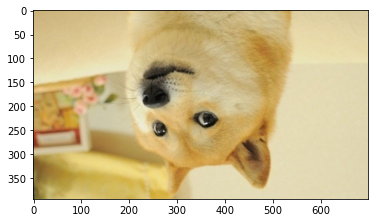

In [12]:
test1 = flip_vertical(image)
show_result(test1)

(394, 700, 3)


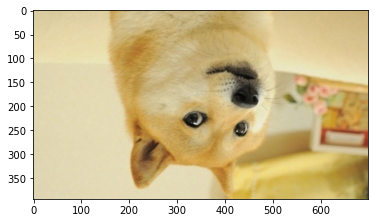

In [13]:
test2 = flip_horizontal(test1)
show_result(test2)

(394, 700, 3)


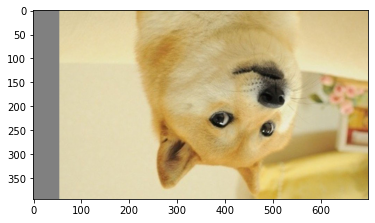

(394, 700, 3)


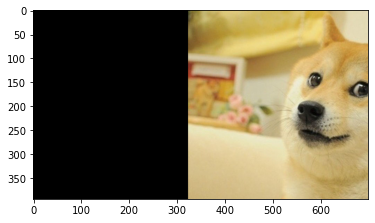

In [14]:
test3 = shift_right(test2,55,grey)
show_result(test3)
test34 = random_shift_right(image,black)
show_result(test34)

(394, 700, 3)


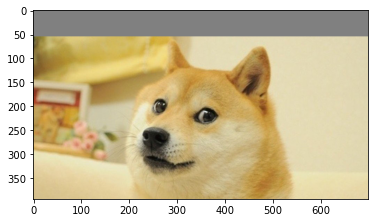

In [15]:
test22 = shift_down(image,55,grey)
show_result(test22)

(394, 700, 3)


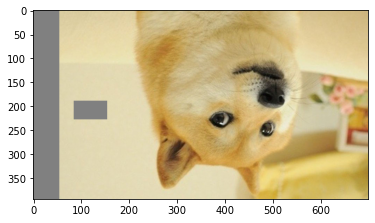

(394, 700, 3)


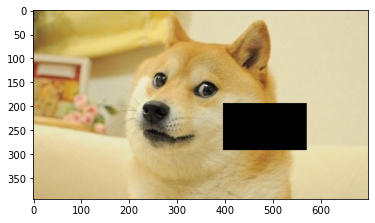

In [16]:
test4 = random_crop(test3,10,grey)
show_result(test4)
test44 = random_crop(image,25,black)
show_result(test44)

(700, 394, 3)


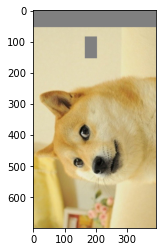

(700, 394, 3)


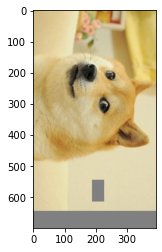

(394, 700, 3)


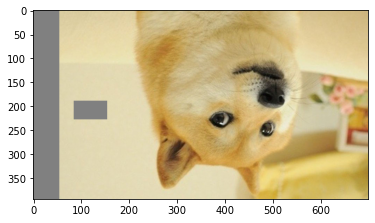

(394, 700, 3)


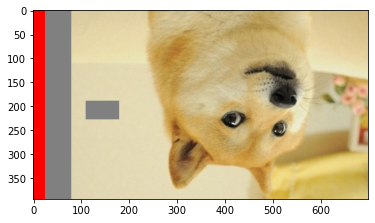

(394, 700, 3)


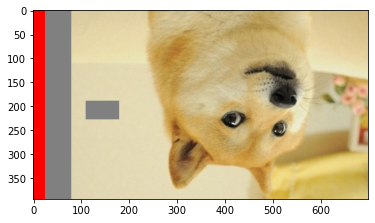

(700, 394, 3)


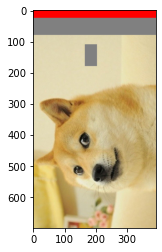

In [17]:
test5=rotate_clockwise(test4,130)
show_result(test5)
test5=rotate_clockwise(test5,220)
show_result(test5)
test5=rotate_clockwise(test5,170)
show_result(test5)
test5 = shift_right(test5,25,red)
show_result(test5)
test5=rotate_clockwise(test5,360)
show_result(test5)
test5=rotate_clockwise(test5,450)
show_result(test5)

## Task 2. Read up on the sobel filter. Convolve the image with the following matrix (use padding to maintain original image size and you can convert the image to a grayscale format to get rid of RGB) then display the resulting 2 images:

<img src="3.png" alt="Neural net cannot be found" width="200">

In [18]:
def padding_image(v_image, padding_n=100):
    new_image = np.pad(v_image, ((padding_n,), (padding_n,), (0,)), mode='constant', constant_values=0)
    return new_image


def rgb2gray(rgb):
    r, g, b = rgb[:, :, 0], rgb[:, :, 1], rgb[:, :, 2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray


def convolution(g_image, kernel):
    h, w = g_image.shape
    m, n = kernel.shape
    new_image = np.zeros((h-(m//2)*2, w-(n//2)*2))
    for i in range(h-2):
        for j in range(w-2):
            new_image[i][j] = np.sum(g_image[i:i + m, j:j + n] * kernel)
    return new_image


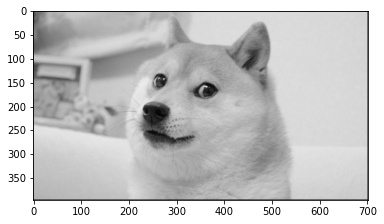

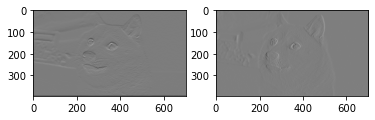

In [19]:
image = set_up("dog.jpg")  # load Original image
p_image = padding_image(image, 1)
g_image = rgb2gray(p_image)
plt.imshow(g_image, cmap=plt.get_cmap('gray'))
plt.show()

kernel_h = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
kernel_v = np.array([[-1, 0, 1], [-2,  0, 2], [-1, 0, 1]])

image_h = convolution(g_image, kernel_h)
image_v = convolution(g_image, kernel_v)

plt.subplot(121)
plt.imshow(image_h, cmap=plt.get_cmap('gray'))
plt.subplot(122)
plt.imshow(image_v, cmap=plt.get_cmap('gray'))
plt.show()
